In [1]:
from sklearn.neural_network import MLPClassifier
import pickle as pk
import numpy as np
import random as rd
from sklearn import metrics
import os
import matplotlib.pyplot as plt

current_dir = os.getcwd()

with open("padded_features.p", "rb") as pickled_file:
    padded_features = pk.load(pickled_file)

UK_OST = [mp3 for mp3 in os.listdir(os.path.join(current_dir, "Audio_Files\\UK_OST"))]
SMG_OST = [mp3 for mp3 in os.listdir(os.path.join(current_dir, "Audio_Files\\SMG_OST"))]
all_OST = UK_OST + SMG_OST

In [2]:
labels = np.concatenate([np.ones(65), np.zeros(81)])
labels_with_titles = list(zip(all_OST, labels))
all_data = list(zip(padded_features, labels_with_titles))
rd.shuffle(all_data)
songs, labels_with_titles = zip(*all_data)
titles, labels = zip(*labels_with_titles)
print(labels_with_titles)

(('04Sunshine(Mirage).mp3', 1.0), ('01Intro.mp3', 1.0), ('(Alt)04Cerberus.mp3', 1.0), ('04DancerintheDarkness.mp3', 1.0), ('07TakeCare.mp3', 1.0), ('ClairdeLune.mp3', 1.0), ('16Guts.mp3', 1.0), ('1-22 Final Battle with Bowser.mp3', 0.0), ('04LakesideSongbook.mp3', 1.0), ('14PanicBetrayer.mp3', 1.0), ('06SufferingLeavesSufferingLeaves.mp3', 1.0), ('1-13 Rosalina in the Observatory 2.mp3', 0.0), ('10TheAbyssandtheSerpent.mp3', 1.0), ('2-29 Buoy Base Galaxy - Undersea.mp3', 0.0), ("2-23 Bowser's Stronghold Appears.mp3", 0.0), ('2-34 Pipe Interior.mp3', 0.0), ('03DeepBlue(EarlyVersionCombatLoop).mp3', 1.0), ('2-44 Heavy Metal Mecha-Bowser.mp3', 0.0), ('2-09 A Chance to Grab a Star!.mp3', 0.0), ('01TheSpinalStaircase.mp3', 1.0), ('1-18 Rosalina in the Observatory 3.mp3', 0.0), ('(Alt)05AThousandGreetings.mp3', 1.0), ('02DeepBlue(EarlyVersionCalmLoop).mp3', 1.0), ('1-28 Super Mario 2007.mp3', 0.0), ('1-26 Purple Comet.mp3', 0.0), ('2-15 Aquatic Race.mp3', 0.0), ('03BullofHell.mp3', 1.0), ('2

In [3]:
train_split = int(len(songs) * 0.75)
train_songs = [songs[i] for i in range(train_split)]
train_labels = [labels[i] for i in range(train_split)]
train_titles = [titles[i] for i in range(train_split)]

test_split = range(train_split, len(songs))
test_songs = [songs[i] for i in test_split]
test_labels = [labels[i] for i in test_split]
test_titles = [titles[i] for i in test_split]

In [4]:
hidden_layers = [1, 10, 100]
hidden_layer_size = [10, 100, 1000]
activation_function = ['tanh', 'relu']

models = []
this_model = []

for k in range(len(activation_function)):
    for j in range(len(hidden_layer_size)):
        for i in range(len(hidden_layers)):
            this_model = []
            for x in range(5):
                model = MLPClassifier(max_iter=100, random_state=None, verbose=True, hidden_layer_sizes=[hidden_layers[i], hidden_layer_size[j]], activation=activation_function[k])
                model.fit(train_songs, train_labels)
                this_model.append(model)

            models.append(this_model)

Iteration 1, loss = 0.69887536
Iteration 2, loss = 0.67990287
Iteration 3, loss = 0.67954614
Iteration 4, loss = 0.67940987
Iteration 5, loss = 0.67925829
Iteration 6, loss = 0.67910172
Iteration 7, loss = 0.67894644
Iteration 8, loss = 0.67879662
Iteration 9, loss = 0.67865518
Iteration 10, loss = 0.67852415
Iteration 11, loss = 0.67840489
Iteration 12, loss = 0.67829828
Iteration 13, loss = 0.67820476
Iteration 14, loss = 0.67812442
Iteration 15, loss = 0.67805701
Iteration 16, loss = 0.67800203
Iteration 17, loss = 0.67795872
Iteration 18, loss = 0.67792613
Iteration 19, loss = 0.67790317
Iteration 20, loss = 0.67788859
Iteration 21, loss = 0.67788110
Iteration 22, loss = 0.67787936
Iteration 23, loss = 0.67788205
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.76377790
Iteration 2, loss = 0.74642104
Iteration 3, loss = 0.72527975
Iteration 4, loss = 0.71447874
Iteration 5, loss = 0.70267381
Iteration 6, loss = 0.701114

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.74548545
Iteration 2, loss = 0.74291244
Iteration 3, loss = 0.74041612
Iteration 4, loss = 0.73859098
Iteration 5, loss = 0.73679171
Iteration 6, loss = 0.73501879
Iteration 7, loss = 0.73327277
Iteration 8, loss = 0.73155417
Iteration 9, loss = 0.72986350
Iteration 10, loss = 0.72820121
Iteration 11, loss = 0.72656777
Iteration 12, loss = 0.72496356
Iteration 13, loss = 0.72338897
Iteration 14, loss = 0.72184434
Iteration 15, loss = 0.72032997
Iteration 16, loss = 0.71884615
Iteration 17, loss = 0.71739312
Iteration 18, loss = 0.71597109
Iteration 19, loss = 0.71458022
Iteration 20, loss = 0.71322067
Iteration 21, loss = 0.71189252
Iteration 22, loss = 0.71059587
Iteration 23, loss = 0.70933073
Iteration 24, loss = 0.70809712
Iteration 25, loss = 0.70689500
Iteration 26, loss = 0.70572431
Iteration 27, loss = 0.70458496
Iteration 28, loss = 0.70347682
Iteration 29, loss = 0.70239972
Iteration 30, loss = 0.70135348
Iteration 31, loss = 0.70033789
Iteration 32, los

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 1.04880145
Iteration 10, loss = 1.04341873
Iteration 11, loss = 1.03756332
Iteration 12, loss = 1.03237122
Iteration 13, loss = 1.02630685
Iteration 14, loss = 1.02112813
Iteration 15, loss = 1.01596707
Iteration 16, loss = 1.01082512
Iteration 17, loss = 1.00570353
Iteration 18, loss = 1.00575171
Iteration 19, loss = 0.99617156
Iteration 20, loss = 0.99047786
Iteration 21, loss = 0.98544988
Iteration 22, loss = 0.98044604
Iteration 23, loss = 0.97546705
Iteration 24, loss = 0.97161813
Iteration 25, loss = 0.96671336
Iteration 26, loss = 0.96183633
Iteration 27, loss = 0.95698762
Iteration 28, loss = 0.95216754
Iteration 29, loss = 0.94737638
Iteration 30, loss = 0.94384885
Iteration 31, loss = 0.93950430
Iteration 32, loss = 0.93446326
Iteration 33, loss = 0.92981767
Iteration 34, loss = 0.92520341
Iteration 35, loss = 0.92062056
Iteration 36, loss = 0.91606922
Iteration 37, loss = 0.91154945
Iteration 38, loss = 0.90706135
Iteration 39, loss = 0.90260500
Iteration

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.82170390
Iteration 2, loss = 0.61577448
Iteration 3, loss = 0.59443812
Iteration 4, loss = 0.57974135
Iteration 5, loss = 0.57778815
Iteration 6, loss = 0.56110112
Iteration 7, loss = 0.55431724
Iteration 8, loss = 0.55149195
Iteration 9, loss = 0.54602281
Iteration 10, loss = 0.54421239
Iteration 11, loss = 0.54660012
Iteration 12, loss = 0.53692618
Iteration 13, loss = 0.53420326
Iteration 14, loss = 0.52943228
Iteration 15, loss = 0.52509937
Iteration 16, loss = 0.52651679
Iteration 17, loss = 0.52701203
Iteration 18, loss = 0.52391272
Iteration 19, loss = 0.52694076
Iteration 20, loss = 0.52207563
Iteration 21, loss = 0.51554996
Iteration 22, loss = 0.50863279
Iteration 23, loss = 0.50516637
Iteration 24, loss = 0.50497299
Iteration 25, loss = 0.50747147
Iteration 26, loss = 0.50315510
Iteration 27, loss = 0.50152450
Iteration 28, loss = 0.49649059
Iteration 29, loss = 0.49531841
Iteration 30, loss = 0.49081802
Iteration 31, loss = 0.48756495
Iteration 32, los

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.91470556
Iteration 2, loss = 0.57434597
Iteration 3, loss = 0.46988471
Iteration 4, loss = 0.42692996
Iteration 5, loss = 0.41911762
Iteration 6, loss = 0.42436819
Iteration 7, loss = 0.40640203
Iteration 8, loss = 0.40726736
Iteration 9, loss = 0.40378157
Iteration 10, loss = 0.40293460
Iteration 11, loss = 0.40658976
Iteration 12, loss = 0.40187683
Iteration 13, loss = 0.39825993
Iteration 14, loss = 0.39851787
Iteration 15, loss = 0.39974456
Iteration 16, loss = 0.39495927
Iteration 17, loss = 0.39074159
Iteration 18, loss = 0.39142647
Iteration 19, loss = 0.38521788
Iteration 20, loss = 0.38222268
Iteration 21, loss = 0.37688149
Iteration 22, loss = 0.37338313
Iteration 23, loss = 0.37778107
Iteration 24, loss = 0.37706104
Iteration 25, loss = 0.37430750
Iteration 26, loss = 0.37335185
Iteration 27, loss = 0.37298493
Iteration 28, loss = 0.38500694
Iteration 29, loss = 0.37076145
Iteration 30, loss = 0.36964683
Iteration 31, loss = 0.37209929
Iteration 32, los

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.70697940
Iteration 2, loss = 0.82820168
Iteration 3, loss = 0.53656049
Iteration 4, loss = 0.49466732
Iteration 5, loss = 0.45872428
Iteration 6, loss = 0.44552813
Iteration 7, loss = 0.44310686
Iteration 8, loss = 0.43786307
Iteration 9, loss = 0.42940552
Iteration 10, loss = 0.42228813
Iteration 11, loss = 0.41914407
Iteration 12, loss = 0.42818552
Iteration 13, loss = 0.42162693
Iteration 14, loss = 0.42853006
Iteration 15, loss = 0.42992210
Iteration 16, loss = 0.42426246
Iteration 17, loss = 0.41959795
Iteration 18, loss = 0.41261960
Iteration 19, loss = 0.41277626
Iteration 20, loss = 0.40220774
Iteration 21, loss = 0.39392826
Iteration 22, loss = 0.39351640
Iteration 23, loss = 0.39312679
Iteration 24, loss = 0.39067089
Iteration 25, loss = 0.39209174
Iteration 26, loss = 0.39562149
Iteration 27, loss = 0.38920803
Iteration 28, loss = 0.38283976
Iteration 29, loss = 0.38351563
Iteration 30, loss = 0.38397892
Iteration 31, loss = 0.37601247
Iteration 32, los

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.68738937
Iteration 11, loss = 0.68506592
Iteration 12, loss = 0.68312327
Iteration 13, loss = 0.68153878
Iteration 14, loss = 0.68028618
Iteration 15, loss = 0.67933587
Iteration 16, loss = 0.67865542
Iteration 17, loss = 0.67821018
Iteration 18, loss = 0.67796412
Iteration 19, loss = 0.67788065
Iteration 20, loss = 0.67792369
Iteration 21, loss = 0.67805864
Iteration 22, loss = 0.67825335
Iteration 23, loss = 0.67847900
Iteration 24, loss = 0.67871081
Iteration 25, loss = 0.67892847
Iteration 26, loss = 0.67911640
Iteration 27, loss = 0.67926374
Iteration 28, loss = 0.67936406
Iteration 29, loss = 0.67941500
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.73600118
Iteration 2, loss = 0.61132805
Iteration 3, loss = 0.61637420
Iteration 4, loss = 0.64791779
Iteration 5, loss = 0.64599225
Iteration 6, loss = 0.63871383
Iteration 7, loss = 0.63925387
Iteration 8, loss = 0.63527625
Iteration 9, loss = 0.

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.67584819
Iteration 5, loss = 0.67114309
Iteration 6, loss = 0.66668097
Iteration 7, loss = 0.66278612
Iteration 8, loss = 0.66009201
Iteration 9, loss = 0.65540569
Iteration 10, loss = 0.65144663
Iteration 11, loss = 0.64782860
Iteration 12, loss = 0.64413416
Iteration 13, loss = 0.64049038
Iteration 14, loss = 0.63688561
Iteration 15, loss = 0.63333583
Iteration 16, loss = 0.62985368
Iteration 17, loss = 0.62644782
Iteration 18, loss = 0.62310652
Iteration 19, loss = 0.61649215
Iteration 20, loss = 0.61301175
Iteration 21, loss = 0.60952592
Iteration 22, loss = 0.60522384
Iteration 23, loss = 0.59913771
Iteration 24, loss = 0.59033276
Iteration 25, loss = 0.59596103
Iteration 26, loss = 0.58307778
Iteration 27, loss = 0.57965083
Iteration 28, loss = 0.56941505
Iteration 29, loss = 0.56605915
Iteration 30, loss = 0.56278934
Iteration 31, loss = 0.55961566
Iteration 32, loss = 0.55654644
Iteration 33, loss = 0.55358839
Iteration 34, loss = 0.55074664
Iteration 35, 

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.51525490
Iteration 5, loss = 0.51827962
Iteration 6, loss = 0.47495775
Iteration 7, loss = 0.48291046
Iteration 8, loss = 0.50552328
Iteration 9, loss = 0.50099898
Iteration 10, loss = 0.47858016
Iteration 11, loss = 0.46872735
Iteration 12, loss = 0.44431180
Iteration 13, loss = 0.44112435
Iteration 14, loss = 0.41475696
Iteration 15, loss = 0.42643846
Iteration 16, loss = 0.43027773
Iteration 17, loss = 0.42410873
Iteration 18, loss = 0.41746140
Iteration 19, loss = 0.41191730
Iteration 20, loss = 0.40093516
Iteration 21, loss = 0.39397865
Iteration 22, loss = 0.39100208
Iteration 23, loss = 0.39304255
Iteration 24, loss = 0.38617042
Iteration 25, loss = 0.39008589
Iteration 26, loss = 0.38506525
Iteration 27, loss = 0.37430329
Iteration 28, loss = 0.36940699
Iteration 29, loss = 0.36101054
Iteration 30, loss = 0.35807930
Iteration 31, loss = 0.37207065
Iteration 32, loss = 0.38346307
Iteration 33, loss = 0.35945668
Iteration 34, loss = 0.36102317
Iteration 35, 

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.51334529
Iteration 5, loss = 0.50028573
Iteration 6, loss = 0.48018377
Iteration 7, loss = 0.48519571
Iteration 8, loss = 0.48708560
Iteration 9, loss = 0.46846828
Iteration 10, loss = 0.46113508
Iteration 11, loss = 0.45327983
Iteration 12, loss = 0.44248755
Iteration 13, loss = 0.42304352
Iteration 14, loss = 0.41781977
Iteration 15, loss = 0.41405209
Iteration 16, loss = 0.40627093
Iteration 17, loss = 0.40699994
Iteration 18, loss = 0.39564170
Iteration 19, loss = 0.40946558
Iteration 20, loss = 0.41682224
Iteration 21, loss = 0.41376659
Iteration 22, loss = 0.40808578
Iteration 23, loss = 0.40693863
Iteration 24, loss = 0.39539626
Iteration 25, loss = 0.40484031
Iteration 26, loss = 0.40510297
Iteration 27, loss = 0.40234406
Iteration 28, loss = 0.39495932
Iteration 29, loss = 0.37912148
Iteration 30, loss = 0.37654622
Iteration 31, loss = 0.36320266
Iteration 32, loss = 0.37308162
Iteration 33, loss = 0.38935882
Iteration 34, loss = 0.38874486
Iteration 35, 

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.80733295
Iteration 2, loss = 0.43103720
Iteration 3, loss = 0.43407086
Iteration 4, loss = 0.39741490
Iteration 5, loss = 0.39742787
Iteration 6, loss = 0.39731077
Iteration 7, loss = 0.37210691
Iteration 8, loss = 0.37059703
Iteration 9, loss = 0.37343522
Iteration 10, loss = 0.37015852
Iteration 11, loss = 0.37103179
Iteration 12, loss = 0.35855572
Iteration 13, loss = 0.35064834
Iteration 14, loss = 0.34912843
Iteration 15, loss = 0.34537390
Iteration 16, loss = 0.33845110
Iteration 17, loss = 0.33571377
Iteration 18, loss = 0.33023485
Iteration 19, loss = 0.32762143
Iteration 20, loss = 0.32254725
Iteration 21, loss = 0.31768910
Iteration 22, loss = 0.31550974
Iteration 23, loss = 0.30884795
Iteration 24, loss = 0.30844488
Iteration 25, loss = 0.29732416
Iteration 26, loss = 0.29202858
Iteration 27, loss = 0.28605951
Iteration 28, loss = 0.27541671
Iteration 29, loss = 0.27787740
Iteration 30, loss = 0.27511281
Iteration 31, loss = 0.27009547
Iteration 32, los

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.64542032
Iteration 2, loss = 0.46673069
Iteration 3, loss = 0.41269953
Iteration 4, loss = 0.41591852
Iteration 5, loss = 0.38591883
Iteration 6, loss = 0.37139793
Iteration 7, loss = 0.38692360
Iteration 8, loss = 0.36382843
Iteration 9, loss = 0.34600355
Iteration 10, loss = 0.31031781
Iteration 11, loss = 0.32000040
Iteration 12, loss = 0.31244483
Iteration 13, loss = 0.32628523
Iteration 14, loss = 0.31141771
Iteration 15, loss = 0.30021497
Iteration 16, loss = 0.28193386
Iteration 17, loss = 0.26474443
Iteration 18, loss = 0.25993719
Iteration 19, loss = 0.24808876
Iteration 20, loss = 0.24901844
Iteration 21, loss = 0.24882017
Iteration 22, loss = 0.25824523
Iteration 23, loss = 0.25601393
Iteration 24, loss = 0.24957049
Iteration 25, loss = 0.24658711
Iteration 26, loss = 0.23581444
Iteration 27, loss = 0.23883966
Iteration 28, loss = 0.22917125
Iteration 29, loss = 0.23022357
Iteration 30, loss = 0.23510205
Iteration 31, loss = 0.22342732
Iteration 32, los

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.76650240
Iteration 2, loss = 0.52366452
Iteration 3, loss = 0.43488553
Iteration 4, loss = 0.42272073
Iteration 5, loss = 0.38160689
Iteration 6, loss = 0.39846795
Iteration 7, loss = 0.36953434
Iteration 8, loss = 0.35944257
Iteration 9, loss = 0.38571033
Iteration 10, loss = 0.36244647
Iteration 11, loss = 0.33465603
Iteration 12, loss = 0.33887765
Iteration 13, loss = 0.34213454
Iteration 14, loss = 0.31991259
Iteration 15, loss = 0.31892021
Iteration 16, loss = 0.31357971
Iteration 17, loss = 0.31497476
Iteration 18, loss = 0.30141909
Iteration 19, loss = 0.29520865
Iteration 20, loss = 0.28552553
Iteration 21, loss = 0.27772760
Iteration 22, loss = 0.27167203
Iteration 23, loss = 0.26832741
Iteration 24, loss = 0.26244432
Iteration 25, loss = 0.25271199
Iteration 26, loss = 0.24377741
Iteration 27, loss = 0.23382224
Iteration 28, loss = 0.22851571
Iteration 29, loss = 0.24144106
Iteration 30, loss = 0.24442847
Iteration 31, loss = 0.24038481
Iteration 32, los

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.69577930
Iteration 13, loss = 0.69556367
Iteration 14, loss = 0.69534984
Iteration 15, loss = 0.69513780
Iteration 16, loss = 0.69492758
Iteration 17, loss = 0.69471917
Iteration 18, loss = 0.69451259
Iteration 19, loss = 0.69430784
Iteration 20, loss = 0.69410491
Iteration 21, loss = 0.69390382
Iteration 22, loss = 0.69370456
Iteration 23, loss = 0.69350713
Iteration 24, loss = 0.69331154
Iteration 25, loss = 0.69311777
Iteration 26, loss = 0.69292583
Iteration 27, loss = 0.69273570
Iteration 28, loss = 0.69254739
Iteration 29, loss = 0.69236088
Iteration 30, loss = 0.69217618
Iteration 31, loss = 0.69199326
Iteration 32, loss = 0.69181212
Iteration 33, loss = 0.69163275
Iteration 34, loss = 0.69145515
Iteration 35, loss = 0.69127928
Iteration 36, loss = 0.69110516
Iteration 37, loss = 0.69093276
Iteration 38, loss = 0.69076206
Iteration 39, loss = 0.69059307
Iteration 40, loss = 0.69042575
Iteration 41, loss = 0.69026011
Iteration 42, loss = 0.69009611
Iteratio

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.73357794
Iteration 10, loss = 0.73249849
Iteration 11, loss = 0.73142733
Iteration 12, loss = 0.73036495
Iteration 13, loss = 0.72931172
Iteration 14, loss = 0.72826792
Iteration 15, loss = 0.72723376
Iteration 16, loss = 0.72620942
Iteration 17, loss = 0.72519505
Iteration 18, loss = 0.72419077
Iteration 19, loss = 0.72319666
Iteration 20, loss = 0.72221281
Iteration 21, loss = 0.72123927
Iteration 22, loss = 0.72027611
Iteration 23, loss = 0.71932335
Iteration 24, loss = 0.71838103
Iteration 25, loss = 0.71744917
Iteration 26, loss = 0.71652778
Iteration 27, loss = 0.71561687
Iteration 28, loss = 0.71471643
Iteration 29, loss = 0.71382646
Iteration 30, loss = 0.71294695
Iteration 31, loss = 0.71207787
Iteration 32, loss = 0.71121921
Iteration 33, loss = 0.71037093
Iteration 34, loss = 0.70953300
Iteration 35, loss = 0.70870538
Iteration 36, loss = 0.70788804
Iteration 37, loss = 0.70708092
Iteration 38, loss = 0.70628399
Iteration 39, loss = 0.70549718
Iteration

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.53487477
Iteration 5, loss = 0.52559285
Iteration 6, loss = 0.52529305
Iteration 7, loss = 0.52512212
Iteration 8, loss = 0.52494611
Iteration 9, loss = 0.52225051
Iteration 10, loss = 0.51665763
Iteration 11, loss = 0.51503017
Iteration 12, loss = 0.51481938
Iteration 13, loss = 0.51461627
Iteration 14, loss = 0.51441462
Iteration 15, loss = 0.51027920
Iteration 16, loss = 0.49737929
Iteration 17, loss = 0.47723512
Iteration 18, loss = 0.47544921
Iteration 19, loss = 0.47512983
Iteration 20, loss = 0.50213273
Iteration 21, loss = 0.47452865
Iteration 22, loss = 0.47422938
Iteration 23, loss = 0.47393591
Iteration 24, loss = 0.47375078
Iteration 25, loss = 0.47532611
Iteration 26, loss = 0.47556691
Iteration 27, loss = 0.47299039
Iteration 28, loss = 0.47251555
Iteration 29, loss = 0.47222725
Iteration 30, loss = 0.47195593
Iteration 31, loss = 0.47169006
Iteration 32, loss = 0.47142876
Iteration 33, loss = 0.47117201
Iteration 34, loss = 0.47091986
Iteration 35, 

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 9.21234119
Iteration 2, loss = 6.21824195
Iteration 3, loss = 2.32764792
Iteration 4, loss = 2.39873701
Iteration 5, loss = 2.38157134
Iteration 6, loss = 1.62830137
Iteration 7, loss = 1.01695149
Iteration 8, loss = 1.12325203
Iteration 9, loss = 0.46851575
Iteration 10, loss = 0.23331721
Iteration 11, loss = 0.26325195
Iteration 12, loss = 0.15316586
Iteration 13, loss = 0.18369952
Iteration 14, loss = 0.11211996
Iteration 15, loss = 0.06502578
Iteration 16, loss = 0.04906428
Iteration 17, loss = 0.04121603
Iteration 18, loss = 0.03369286
Iteration 19, loss = 0.02680019
Iteration 20, loss = 0.02132385
Iteration 21, loss = 0.01709966
Iteration 22, loss = 0.01413904
Iteration 23, loss = 0.01236078
Iteration 24, loss = 0.01151969
Iteration 25, loss = 0.01122764
Iteration 26, loss = 0.01126029
Iteration 27, loss = 0.01134897
Iteration 28, loss = 0.01134107
Iteration 29, loss = 0.01112146
Iteration 30, loss = 0.01065086
Iteration 31, loss = 0.01001418
Iteration 32, los

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.43893326
Iteration 6, loss = 0.38726315
Iteration 7, loss = 0.38766218
Iteration 8, loss = 0.39457637
Iteration 9, loss = 0.41755027
Iteration 10, loss = 0.42340765
Iteration 11, loss = 0.42452659
Iteration 12, loss = 0.40649570
Iteration 13, loss = 0.38726191
Iteration 14, loss = 0.37083458
Iteration 15, loss = 0.35945395
Iteration 16, loss = 0.34489955
Iteration 17, loss = 0.33860550
Iteration 18, loss = 0.33049752
Iteration 19, loss = 0.32660405
Iteration 20, loss = 0.31650096
Iteration 21, loss = 0.31396033
Iteration 22, loss = 0.31705243
Iteration 23, loss = 0.31491805
Iteration 24, loss = 0.31445166
Iteration 25, loss = 0.30772214
Iteration 26, loss = 0.29930654
Iteration 27, loss = 0.29244866
Iteration 28, loss = 0.28662742
Iteration 29, loss = 0.28373808
Iteration 30, loss = 0.27737363
Iteration 31, loss = 0.27363677
Iteration 32, loss = 0.26976182
Iteration 33, loss = 0.26609002
Iteration 34, loss = 0.26284693
Iteration 35, loss = 0.26129466
Iteration 36,

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 7.64124303
Iteration 3, loss = 2.84706512
Iteration 4, loss = 2.14006786
Iteration 5, loss = 1.19718079
Iteration 6, loss = 1.46743916
Iteration 7, loss = 1.56235899
Iteration 8, loss = 1.18496589
Iteration 9, loss = 0.66009620
Iteration 10, loss = 0.48719760
Iteration 11, loss = 0.57273500
Iteration 12, loss = 0.36490031
Iteration 13, loss = 0.20703461
Iteration 14, loss = 0.14938027
Iteration 15, loss = 0.12801800
Iteration 16, loss = 0.09315619
Iteration 17, loss = 0.05371892
Iteration 18, loss = 0.04152806
Iteration 19, loss = 0.03719274
Iteration 20, loss = 0.03892885
Iteration 21, loss = 0.04064947
Iteration 22, loss = 0.03448268
Iteration 23, loss = 0.02646892
Iteration 24, loss = 0.02257913
Iteration 25, loss = 0.02119082
Iteration 26, loss = 0.02014087
Iteration 27, loss = 0.01863455
Iteration 28, loss = 0.01666472
Iteration 29, loss = 0.01457863
Iteration 30, loss = 0.01273887
Iteration 31, loss = 0.01147741
Iteration 32, loss = 0.01051518
Iteration 33, lo

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 5.67768096
Iteration 2, loss = 6.78287041
Iteration 3, loss = 3.28626173
Iteration 4, loss = 5.00097025
Iteration 5, loss = 2.44063544
Iteration 6, loss = 0.24354698
Iteration 7, loss = 0.55630849
Iteration 8, loss = 0.12587447
Iteration 9, loss = 0.07769611
Iteration 10, loss = 0.16008668
Iteration 11, loss = 0.09442123
Iteration 12, loss = 0.00957337
Iteration 13, loss = 0.02482890
Iteration 14, loss = 0.03723705
Iteration 15, loss = 0.02726619
Iteration 16, loss = 0.00665253
Iteration 17, loss = 0.00134808
Iteration 18, loss = 0.00221824
Iteration 19, loss = 0.00267777
Iteration 20, loss = 0.00157345
Iteration 21, loss = 0.00066364
Iteration 22, loss = 0.00032822
Iteration 23, loss = 0.00022733
Iteration 24, loss = 0.00019709
Iteration 25, loss = 0.00018780
Iteration 26, loss = 0.00018507
Iteration 27, loss = 0.00018454
Iteration 28, loss = 0.00018487
Iteration 29, loss = 0.00018552
Iteration 30, loss = 0.00018629
Iteration 31, loss = 0.00018708
Iteration 32, los

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 1.44712484
Iteration 5, loss = 0.57436547
Iteration 6, loss = 0.36223463
Iteration 7, loss = 0.41102527
Iteration 8, loss = 0.43649223
Iteration 9, loss = 0.44845813
Iteration 10, loss = 0.43430824
Iteration 11, loss = 0.42642905
Iteration 12, loss = 0.41991334
Iteration 13, loss = 0.40527143
Iteration 14, loss = 0.38948711
Iteration 15, loss = 0.38419251
Iteration 16, loss = 0.37738929
Iteration 17, loss = 0.34943533
Iteration 18, loss = 0.34710120
Iteration 19, loss = 0.34569245
Iteration 20, loss = 0.34179117
Iteration 21, loss = 0.33598033
Iteration 22, loss = 0.33181199
Iteration 23, loss = 0.33483107
Iteration 24, loss = 0.33569176
Iteration 25, loss = 0.33133551
Iteration 26, loss = 0.32851264
Iteration 27, loss = 0.32884638
Iteration 28, loss = 0.32883402
Iteration 29, loss = 0.32828961
Iteration 30, loss = 0.32737532
Iteration 31, loss = 0.32641085
Iteration 32, loss = 0.32556375
Iteration 33, loss = 0.32489023
Iteration 34, loss = 0.32434791
Iteration 35, 

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 4.19785143
Iteration 2, loss = 7.88467337
Iteration 3, loss = 6.75885396
Iteration 4, loss = 4.25293164
Iteration 5, loss = 2.94819086
Iteration 6, loss = 1.97847969
Iteration 7, loss = 1.23382238
Iteration 8, loss = 1.19113089
Iteration 9, loss = 0.04280198
Iteration 10, loss = 0.15035730
Iteration 11, loss = 0.37061392
Iteration 12, loss = 0.24620431
Iteration 13, loss = 0.03513021
Iteration 14, loss = 0.01509469
Iteration 15, loss = 0.00345355
Iteration 16, loss = 0.00106686
Iteration 17, loss = 0.00184651
Iteration 18, loss = 0.01246548
Iteration 19, loss = 0.00181032
Iteration 20, loss = 0.00232283
Iteration 21, loss = 0.00613256
Iteration 22, loss = 0.00814851
Iteration 23, loss = 0.00493576
Iteration 24, loss = 0.00169178
Iteration 25, loss = 0.00082788
Iteration 26, loss = 0.00061169
Iteration 27, loss = 0.00047166
Iteration 28, loss = 0.00048901
Iteration 29, loss = 0.00053680
Iteration 30, loss = 0.00056858
Iteration 31, loss = 0.00053298
Iteration 32, los

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.45091454
Iteration 5, loss = 0.43368069
Iteration 6, loss = 0.41798193
Iteration 7, loss = 0.38968798
Iteration 8, loss = 0.37797241
Iteration 9, loss = 0.35075767
Iteration 10, loss = 0.33824149
Iteration 11, loss = 0.32335091
Iteration 12, loss = 0.30490281
Iteration 13, loss = 0.28917467
Iteration 14, loss = 0.27088649
Iteration 15, loss = 0.25570799
Iteration 16, loss = 0.25029018
Iteration 17, loss = 0.25249857
Iteration 18, loss = 0.23799109
Iteration 19, loss = 0.22704775
Iteration 20, loss = 0.22066987
Iteration 21, loss = 0.22424977
Iteration 22, loss = 0.21587165
Iteration 23, loss = 0.22764682
Iteration 24, loss = 0.21511168
Iteration 25, loss = 0.21485969
Iteration 26, loss = 0.21646225
Iteration 27, loss = 0.21994906
Iteration 28, loss = 0.21984467
Iteration 29, loss = 0.21976110
Iteration 30, loss = 0.21968298
Iteration 31, loss = 0.21964198
Iteration 32, loss = 0.21973654
Iteration 33, loss = 0.22004906
Iteration 34, loss = 0.22009725
Iteration 35, 

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.99494579
Iteration 2, loss = 20.04884469
Iteration 3, loss = 11.11293150
Iteration 4, loss = 7.90012228
Iteration 5, loss = 7.95025063
Iteration 6, loss = 4.62146427
Iteration 7, loss = 1.34505441
Iteration 8, loss = 2.52063068
Iteration 9, loss = 2.71677062
Iteration 10, loss = 1.32528514
Iteration 11, loss = 0.95521493
Iteration 12, loss = 0.96670061
Iteration 13, loss = 0.83569454
Iteration 14, loss = 0.59978901
Iteration 15, loss = 0.42297020
Iteration 16, loss = 0.33661459
Iteration 17, loss = 0.28579645
Iteration 18, loss = 0.25736413
Iteration 19, loss = 0.24058998
Iteration 20, loss = 0.22923091
Iteration 21, loss = 0.22588669
Iteration 22, loss = 0.22482676
Iteration 23, loss = 0.22625575
Iteration 24, loss = 0.22550484
Iteration 25, loss = 0.22058692
Iteration 26, loss = 0.21111315
Iteration 27, loss = 0.19858827
Iteration 28, loss = 0.18313276
Iteration 29, loss = 0.16607182
Iteration 30, loss = 0.14996804
Iteration 31, loss = 0.13571085
Iteration 32, l

In [5]:
model_idx = 0
models_predicted = []

for k in range(len(activation_function)):
    for j in range(len(hidden_layer_size)):
        for i in range(len(hidden_layers)):
            this_model_predicted = []
            for x in range(5):
                print(f"Model {model_idx}, iteration {x}")
                print(f"Hidden layers: {hidden_layers[j]} \t Hidden layer size: {hidden_layer_size[i]} \t Activation function: {activation_function[k]}")
                label_predict = models[model_idx][x].predict(test_songs)
                print(metrics.classification_report(test_labels, label_predict))
                print('\n\n')
                this_model_predicted.append(label_predict)
            models_predicted.append(this_model_predicted)
            model_idx+= 1

Model 0, iteration 0
Hidden layers: 1 	 Hidden layer size: 10 	 Activation function: tanh
              precision    recall  f1-score   support

         0.0       0.46      1.00      0.63        17
         1.0       0.00      0.00      0.00        20

    accuracy                           0.46        37
   macro avg       0.23      0.50      0.31        37
weighted avg       0.21      0.46      0.29        37




Model 0, iteration 1
Hidden layers: 1 	 Hidden layer size: 10 	 Activation function: tanh
              precision    recall  f1-score   support

         0.0       0.59      1.00      0.74        17
         1.0       1.00      0.40      0.57        20

    accuracy                           0.68        37
   macro avg       0.79      0.70      0.66        37
weighted avg       0.81      0.68      0.65        37




Model 0, iteration 2
Hidden layers: 1 	 Hidden layer size: 10 	 Activation function: tanh
              precision    recall  f1-score   support

         0.0   

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75        17
         1.0       0.77      0.85      0.81        20

    accuracy                           0.78        37
   macro avg       0.79      0.78      0.78        37
weighted avg       0.79      0.78      0.78        37




Model 3, iteration 0
Hidden layers: 10 	 Hidden layer size: 10 	 Activation function: tanh
              precision    recall  f1-score   support

         0.0       0.46      1.00      0.63        17
         1.0       0.00      0.00      0.00        20

    accuracy                           0.46        37
   macro avg       0.23      0.50      0.31        37
weighted avg       0.21      0.46      0.29        37




Model 3, iteration 1
Hidden layers: 10 	 Hidden layer size: 10 	 Activation function: tanh
              precision    recall  f1-score   support

         0.0       0.91      0.59      0.71        17
         1.0       0.73      0.95      0.83      

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80        17
         1.0       0.84      0.80      0.82        20

    accuracy                           0.81        37
   macro avg       0.81      0.81      0.81        37
weighted avg       0.81      0.81      0.81        37




Model 5, iteration 4
Hidden layers: 10 	 Hidden layer size: 1000 	 Activation function: tanh
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        17
         1.0       0.90      0.90      0.90        20

    accuracy                           0.89        37
   macro avg       0.89      0.89      0.89        37
weighted avg       0.89      0.89      0.89        37




Model 6, iteration 0
Hidden layers: 100 	 Hidden layer size: 10 	 Activation function: tanh
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86        17
         1.0       0.94      0.80      0.86   

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

         0.0       0.76      0.94      0.84        17
         1.0       0.94      0.75      0.83        20

    accuracy                           0.84        37
   macro avg       0.85      0.85      0.84        37
weighted avg       0.86      0.84      0.84        37




Model 8, iteration 2
Hidden layers: 100 	 Hidden layer size: 1000 	 Activation function: tanh
              precision    recall  f1-score   support

         0.0       0.76      0.94      0.84        17
         1.0       0.94      0.75      0.83        20

    accuracy                           0.84        37
   macro avg       0.85      0.85      0.84        37
weighted avg       0.86      0.84      0.84        37




Model 8, iteration 3
Hidden layers: 100 	 Hidden layer size: 1000 	 Activation function: tanh
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        17
         1.0       0.85      0.85      0.85

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91        17
         1.0       0.95      0.90      0.92        20

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37




Model 11, iteration 1
Hidden layers: 1 	 Hidden layer size: 1000 	 Activation function: relu
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86        17
         1.0       0.94      0.80      0.86        20

    accuracy                           0.86        37
   macro avg       0.87      0.87      0.86        37
weighted avg       0.88      0.86      0.86        37




Model 11, iteration 2
Hidden layers: 1 	 Hidden layer size: 1000 	 Activation function: relu
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77        17
         1.0       1.00      0.50      0.67  

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

         0.0       0.76      0.94      0.84        17
         1.0       0.94      0.75      0.83        20

    accuracy                           0.84        37
   macro avg       0.85      0.85      0.84        37
weighted avg       0.86      0.84      0.84        37




Model 14, iteration 0
Hidden layers: 10 	 Hidden layer size: 1000 	 Activation function: relu
              precision    recall  f1-score   support

         0.0       0.65      0.76      0.70        17
         1.0       0.76      0.65      0.70        20

    accuracy                           0.70        37
   macro avg       0.71      0.71      0.70        37
weighted avg       0.71      0.70      0.70        37




Model 14, iteration 1
Hidden layers: 10 	 Hidden layer size: 1000 	 Activation function: relu
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        17
         1.0       0.85      0.85      0.85

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        17
         1.0       0.90      0.90      0.90        20

    accuracy                           0.89        37
   macro avg       0.89      0.89      0.89        37
weighted avg       0.89      0.89      0.89        37




Model 17, iteration 0
Hidden layers: 100 	 Hidden layer size: 1000 	 Activation function: relu
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        17
         1.0       0.90      0.90      0.90        20

    accuracy                           0.89        37
   macro avg       0.89      0.89      0.89        37
weighted avg       0.89      0.89      0.89        37




Model 17, iteration 1
Hidden layers: 100 	 Hidden layer size: 1000 	 Activation function: relu
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83        17
         1.0       0.89      0.80      0.

In [6]:
# model_idx = 17
# iter_idx = 0

# for i in range(len(test_songs)):
#     probs = models[model_idx][iter_idx].predict_proba(test_songs)
#     pred = models[model_idx][iter_idx].predict(test_songs)
#     pred_OST = "ULTRAKILL" if pred[i] == 1 else "Super Mario Galaxy"
#     actual_OST = "ULTRAKILL" if test_labels[i] == 1 else "Super Mario Galaxy"
#     print(f"{test_titles[i]} ({actual_OST}): {pred_OST} (likelihood: {np.round(max(probs[i]), 3)})")
#     print()

# print(metrics.classification_report(test_labels, pred))

# print(list(zip(test_labels, test_titles)))

In [8]:
model_idx = 0
macro_f1_scores = []

for k in range(len(activation_function)):
    for j in range(len(hidden_layer_size)):
        for i in range(len(hidden_layers)):
            print(f"Model {model_idx}")
            print(f"Hidden layers: {hidden_layers[i]} \t Hidden layer size: {hidden_layer_size[j]} \t Activation function: {activation_function[k]}")
            print()
            print(f"\tPrecision:") 
            print(f"\t\tULTRAKILL: {np.round(np.average([metrics.precision_score(models_predicted[model_idx][z], test_labels) for z in range(len(models_predicted[model_idx]))]), 3)}")
            print(f"\t\tMario Galaxy: {np.round(np.average([metrics.precision_score(models_predicted[model_idx][z], test_labels, pos_label=0) for z in range(len(models_predicted[model_idx]))]), 3)}")
            print()
            print(f"\tRecall:") 
            print(f"\t\tULTRAKILL: {np.round(np.average([metrics.recall_score(models_predicted[model_idx][z], test_labels) for z in range(len(models_predicted[model_idx]))]), 3)}")
            print(f"\t\tMario Galaxy: {np.round(np.average([metrics.recall_score(models_predicted[model_idx][z], test_labels, pos_label=0) for z in range(len(models_predicted[model_idx]))]), 3)}")
            print()
            print(f"\tF1:") 
            print(f"\t\tULTRAKILL: {np.round(np.average([metrics.f1_score(models_predicted[model_idx][z], test_labels, ) for z in range(len(models_predicted[model_idx]))]), 3)}")
            print(f"\t\tMario Galaxy: {np.round(np.average([metrics.f1_score(models_predicted[model_idx][z], test_labels, pos_label=0) for z in range(len(models_predicted[model_idx]))]), 3)}")
            print()
            print(f"\tAccuracy: {np.round(np.average([metrics.accuracy_score(models_predicted[model_idx][z], test_labels) for z in range(len(models_predicted[model_idx]))]), 3)}")
            print(f"\tMacro F1: {np.round(np.average([metrics.f1_score(models_predicted[model_idx][z], test_labels, ) for z in range(len(models_predicted[model_idx]))]), 3)}")
            print('\n\n\n\n')

            macro_f1_scores.append(np.round(np.average([metrics.f1_score(models_predicted[model_idx][z], test_labels, ) for z in range(len(models_predicted[model_idx]))]), 3))
            model_idx+= 1

Model 0
Hidden layers: 1 	 Hidden layer size: 10 	 Activation function: tanh

	Precision:
		ULTRAKILL: 0.38
		Mario Galaxy: 0.8

	Recall:
		ULTRAKILL: 0.508
		Mario Galaxy: 0.427

	F1:
		ULTRAKILL: 0.388
		Mario Galaxy: 0.554

	Accuracy: 0.573
	Macro F1: 0.388





Model 1
Hidden layers: 10 	 Hidden layer size: 10 	 Activation function: tanh

	Precision:
		ULTRAKILL: 0.71
		Mario Galaxy: 0.965

	Recall:
		ULTRAKILL: 0.968
		Mario Galaxy: 0.751

	F1:
		ULTRAKILL: 0.809
		Mario Galaxy: 0.84

	Accuracy: 0.827
	Macro F1: 0.809





Model 2
Hidden layers: 100 	 Hidden layer size: 10 	 Activation function: tanh

	Precision:
		ULTRAKILL: 0.84
		Mario Galaxy: 0.894

	Recall:
		ULTRAKILL: 0.911
		Mario Galaxy: 0.83

	F1:
		ULTRAKILL: 0.871
		Mario Galaxy: 0.857

	Accuracy: 0.865
	Macro F1: 0.871





Model 3
Hidden layers: 1 	 Hidden layer size: 100 	 Activation function: tanh

	Precision:
		ULTRAKILL: 0.51
		Mario Galaxy: 0.882

	Recall:
		ULTRAKILL: 0.716
		Mario Galaxy: 0.671

	F1:
		ULTRAKI

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python3

	Macro F1: 0.861





Model 5
Hidden layers: 100 	 Hidden layer size: 100 	 Activation function: tanh

	Precision:
		ULTRAKILL: 0.86
		Mario Galaxy: 0.871

	Recall:
		ULTRAKILL: 0.89
		Mario Galaxy: 0.843

	F1:
		ULTRAKILL: 0.873
		Mario Galaxy: 0.855

	Accuracy: 0.865
	Macro F1: 0.873





Model 6
Hidden layers: 1 	 Hidden layer size: 1000 	 Activation function: tanh

	Precision:
		ULTRAKILL: 0.68
		Mario Galaxy: 0.835

	Recall:
		ULTRAKILL: 0.682
		Mario Galaxy: 0.753

	F1:
		ULTRAKILL: 0.674
		Mario Galaxy: 0.763

	Accuracy: 0.751
	Macro F1: 0.674





Model 7
Hidden layers: 10 	 Hidden layer size: 1000 	 Activation function: tanh

	Precision:
		ULTRAKILL: 0.79
		Mario Galaxy: 0.965

	Recall:
		ULTRAKILL: 0.97
		Mario Galaxy: 0.798

	F1:
		ULTRAKILL: 0.868
		Mario Galaxy: 0.871

	Accuracy: 0.87
	Macro F1: 0.868





Model 8
Hidden layers: 100 	 Hidden layer size: 1000 	 Activation function: tanh

	Precision:
		ULTRAKILL: 0.81
		Mario Galaxy: 0.859

	Recall:
		ULTRAKILL: 0.883
		Mari

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python3

	Macro F1: 0.49





Model 10
Hidden layers: 10 	 Hidden layer size: 10 	 Activation function: relu

	Precision:
		ULTRAKILL: 0.72
		Mario Galaxy: 0.882

	Recall:
		ULTRAKILL: 0.714
		Mario Galaxy: 0.803

	F1:
		ULTRAKILL: 0.712
		Mario Galaxy: 0.814

	Accuracy: 0.795
	Macro F1: 0.712





Model 11
Hidden layers: 100 	 Hidden layer size: 10 	 Activation function: relu

	Precision:
		ULTRAKILL: 0.79
		Mario Galaxy: 0.847

	Recall:
		ULTRAKILL: 0.881
		Mario Galaxy: 0.795

	F1:
		ULTRAKILL: 0.816
		Mario Galaxy: 0.808

	Accuracy: 0.816
	Macro F1: 0.816





Model 12
Hidden layers: 1 	 Hidden layer size: 100 	 Activation function: relu

	Precision:
		ULTRAKILL: 0.15
		Mario Galaxy: 1.0

	Recall:
		ULTRAKILL: 0.2
		Mario Galaxy: 0.522

	F1:
		ULTRAKILL: 0.171
		Mario Galaxy: 0.678

	Accuracy: 0.541
	Macro F1: 0.171





Model 13
Hidden layers: 10 	 Hidden layer size: 100 	 Activation function: relu

	Precision:
		ULTRAKILL: 0.81
		Mario Galaxy: 0.953

	Recall:
		ULTRAKILL: 0.956
		Mario Ga

i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
i:\Users\Peter\AppData\Local\Programs\Python\Python3

		ULTRAKILL: 0.833
		Mario Galaxy: 0.771

	F1:
		ULTRAKILL: 0.809
		Mario Galaxy: 0.789

	Accuracy: 0.8
	Macro F1: 0.809





Model 15
Hidden layers: 1 	 Hidden layer size: 1000 	 Activation function: relu

	Precision:
		ULTRAKILL: 0.3
		Mario Galaxy: 1.0

	Recall:
		ULTRAKILL: 0.4
		Mario Galaxy: 0.585

	F1:
		ULTRAKILL: 0.343
		Mario Galaxy: 0.726

	Accuracy: 0.622
	Macro F1: 0.343





Model 16
Hidden layers: 10 	 Hidden layer size: 1000 	 Activation function: relu

	Precision:
		ULTRAKILL: 0.85
		Mario Galaxy: 0.918

	Recall:
		ULTRAKILL: 0.928
		Mario Galaxy: 0.843

	F1:
		ULTRAKILL: 0.885
		Mario Galaxy: 0.877

	Accuracy: 0.881
	Macro F1: 0.885





Model 17
Hidden layers: 100 	 Hidden layer size: 1000 	 Activation function: relu

	Precision:
		ULTRAKILL: 0.87
		Mario Galaxy: 0.812

	Recall:
		ULTRAKILL: 0.851
		Mario Galaxy: 0.844

	F1:
		ULTRAKILL: 0.858
		Mario Galaxy: 0.823

	Accuracy: 0.843
	Macro F1: 0.858







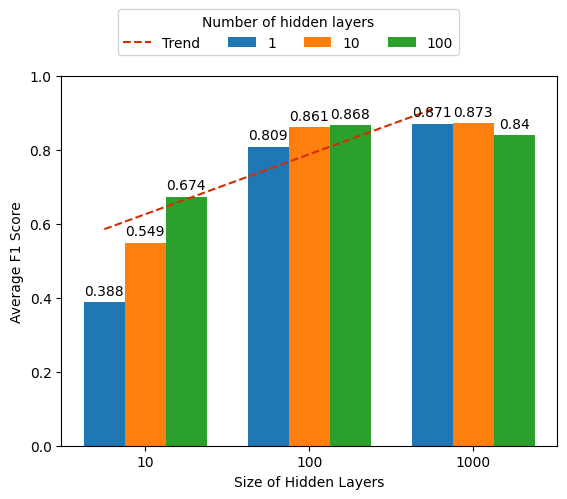

In [45]:
fig, ax = plt.subplots()

# plt.xscale("log")
ax.set_ylim(0, 1)


x = np.arange(len(hidden_layers))
w = 0.25
multiplier = 0

f1s = [macro_f1_scores[:3], macro_f1_scores[3:6], macro_f1_scores[6:9]]
f1s_arr = np.array(f1s)

trend_line = np.polyfit(np.tile(x, (len(f1s), 1)).flatten(), f1s_arr.flatten(), 1)
trend_x = np.linspace(min(x), max(x), 100)
trend_y = np.polyval(trend_line, trend_x)
ax.plot(trend_x, trend_y, color='#D52D00', linestyle='--', label='Trend')

for i in range(len(f1s)):
    offset = w * multiplier
    rects = ax.bar(x + offset, f1s[i], w, label=hidden_layers[i])
    ax.bar_label(rects, padding=3)
    multiplier += 1

    ax.set_xticks(x + w, hidden_layer_size)
    ax.legend(loc='upper left', ncols=4, title="Number of hidden layers", bbox_to_anchor=(0.1,1.2))
    ax.set_xlabel("Size of Hidden Layers")
    ax.set_ylabel("Average F1 Score")

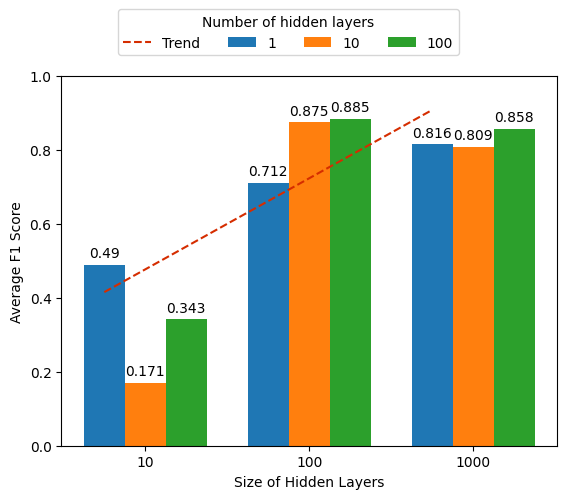

In [44]:
fig, ax = plt.subplots()

# plt.xscale("log")
ax.set_ylim(0, 1)


x = np.arange(len(hidden_layers))
w = 0.25
multiplier = 0

f1s = [macro_f1_scores[9:12], macro_f1_scores[12:15], macro_f1_scores[15:18]]
f1s_arr = np.array(f1s)

trend_line = np.polyfit(np.tile(x, (len(f1s), 1)).flatten(), f1s_arr.flatten(), 1)
trend_x = np.linspace(min(x), max(x), 100)
trend_y = np.polyval(trend_line, trend_x)
ax.plot(trend_x, trend_y, color='#D52D00', linestyle='--', label='Trend')

for i in range(len(f1s)):
    offset = w * multiplier
    rects = ax.bar(x + offset, f1s[i], w, label=hidden_layers[i])
    ax.bar_label(rects, padding=3)
    multiplier += 1

    ax.set_xticks(x + w, hidden_layer_size)
    ax.legend(loc='upper left', ncols=4, title="Number of hidden layers", bbox_to_anchor=(0.1,1.2))
    ax.set_xlabel("Size of Hidden Layers")
    ax.set_ylabel("Average F1 Score")